# Question 1

In [7]:
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 351s 13us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step


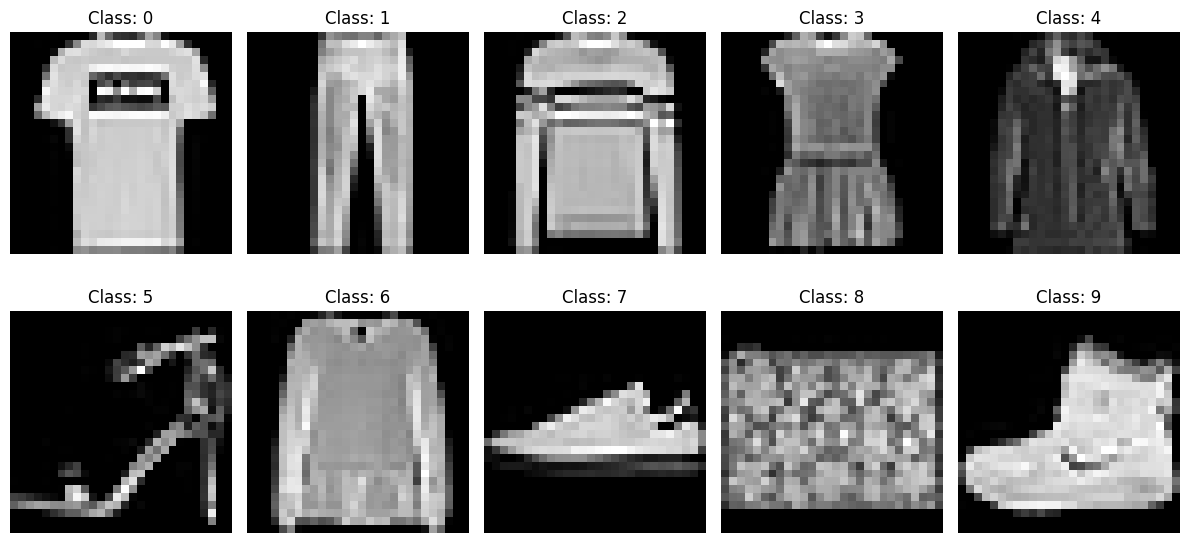

In [17]:
samples = []
labels = []

for class_label in range(10):
    index = np.where(y_train == class_label)[0][0]
    samples.append(x_train[index])
    labels.append(y_train[index])
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(samples[i], cmap='gray')
    axes[i].set_title(f"Class: {labels[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# Question 2

In [22]:
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def identity(x):
    return x

In [ ]:
class Layer():
    def __init__(self, size, activation='sigmoid'):
        self.size = size
        self.activation = activation
    
    def printLayer(self):
        print(self.size)

class Sequential():
    def __init__(self):
        self.layers = []
        self.weights = []
        self.biases = []

    def add(self, layer: Layer):
        self.layers.append(layer)

    def create_parameters(self):
        for i in range(len(self.layers)-1):

            current_size = self.layers[i].size
            next_size = self.layers[i+1].size

            if self.weight_init == 'random':
                # Random initialization
                weight_matrix = np.random.randn(next_size, current_size)
            elif self.weight_init.lower() == 'xavier':
                # Xavier initialization
                weight_matrix = np.random.randn(next_size, current_size) * np.sqrt(1. / current_size)
            self.weights.append(weight_matrix)

            bias_vector = np.random.randn(next_size.size)
            self.biases.append(bias_vector)

    def forward(self, x):
        for i in range(len(self.layers)-1):
            x = np.dot(self.weights[i], x) + self.biases[i]
            if self.layers[i+1].activation == 'relu':
                x = relu(x)
            elif self.layers[i+1].activation == 'sigmoid':
                x = sigmoid(x)
            elif self.layers[i+1].activation == 'tanh':
                x = tanh(x)
            elif self.layers[i+1].activation == 'identity':
                x = identity(x)
        return x

In [21]:
# Example 
model = Sequential()
model.add(Layer(784))  
model.add(Layer(64))   
model.add(Layer(10))   
model.create_parameters()

for i, W in enumerate(model.weights):
    print(f"Weight matrix {i} shape: {W.shape}")
for i, b in enumerate(model.biases):
    print(f"Bias vector {i} shape: {b.shape}")

Weight matrix 0 shape: (64, 784)
Weight matrix 1 shape: (10, 64)
Bias vector 0 shape: (64,)
Bias vector 1 shape: (10,)
